<a href="https://colab.research.google.com/github/bhkpriyanka/EVA4/blob/master/Week9/PythonFiles/Models/Week9_Albumentations_hardcodedMean%26SD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
import sys
sys.path.append('/content/gdrive/My Drive/EVA4_2020/Week9/PythonFiles/')
sys.path.append('/content/gdrive/My Drive/EVA4_2020/Week9/PythonFiles/Models')
sys.path.append('/content/gdrive/My Drive/EVA4_2020/Week9/PythonFiles/Transforms')
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content/gdrive/My Drive/EVA4_2020/Week9/PythonFiles/', '/content/gdrive/My Drive/EVA4_2020/Week9/PythonFiles/Models', '/content/gdrive/My Drive/EVA4_2020/Week9/PythonFiles/Transforms']


In [0]:
from all_imports import *
#import pytorch_tfmn_dataloader as dl 
import albumentation_tfmn_dataloader as dl        # Loading CIFAR10 data into train/test dataloaders
import resnet_model_file as mfile                 # ResNet18 Model architecture
import train_test_functions as ttfunc             # Model training and validation functions
import test_performance as tperform               # Class wise model accuracy and confusion matrix plot
import model_plots as mp                          # Plotting the Train/Test plots for loss and accuracy
import misclassified                              # Display misclassified images by the trained model

In [4]:
trainloader, testloader = dl.train_test_loaders(128)   #arguments are batchsize, rotation value

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Train Images count 50000
Test Images count 10000


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
#!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
dp = [0.15,0.15,0.2,0.2] ##dropout values
model = mfile.ResNet18(dp).to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
        BasicBlock-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,864
      BatchNorm2d-14           [-1

In [7]:
model = mfile.ResNet18(dp).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9, weight_decay= 0.001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    tra,trl = ttfunc.train(model, device, trainloader, optimizer, epoch)
    tea,tel = ttfunc.test(model, device, testloader,classes)
    scheduler.step()
    print('')


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.3425425291061401 Batch_id=390 Accuracy=35.49: 100%|██████████| 391/391 [00:33<00:00, 11.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 4914/10000 (49.14%)


EPOCH: 2


Loss=1.1454923152923584 Batch_id=390 Accuracy=51.79: 100%|██████████| 391/391 [00:33<00:00, 11.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0095, Accuracy: 5596/10000 (55.96%)


EPOCH: 3


Loss=0.8985768556594849 Batch_id=390 Accuracy=61.31: 100%|██████████| 391/391 [00:33<00:00, 11.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 6518/10000 (65.18%)


EPOCH: 4


Loss=1.1208176612854004 Batch_id=390 Accuracy=67.06: 100%|██████████| 391/391 [00:33<00:00, 11.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7147/10000 (71.47%)


EPOCH: 5


Loss=0.6272643804550171 Batch_id=390 Accuracy=70.85: 100%|██████████| 391/391 [00:33<00:00, 11.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7361/10000 (73.61%)


EPOCH: 6


Loss=0.6955981254577637 Batch_id=390 Accuracy=73.40: 100%|██████████| 391/391 [00:33<00:00, 11.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 7305/10000 (73.05%)


EPOCH: 7


Loss=0.7809613347053528 Batch_id=390 Accuracy=75.08: 100%|██████████| 391/391 [00:33<00:00, 11.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7578/10000 (75.78%)


EPOCH: 8


Loss=0.5366224646568298 Batch_id=390 Accuracy=76.70: 100%|██████████| 391/391 [00:33<00:00, 11.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7453/10000 (74.53%)


EPOCH: 9


Loss=0.7657044529914856 Batch_id=390 Accuracy=77.10: 100%|██████████| 391/391 [00:33<00:00, 11.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7829/10000 (78.29%)


EPOCH: 10


Loss=0.4209981858730316 Batch_id=390 Accuracy=77.90: 100%|██████████| 391/391 [00:32<00:00, 11.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 7784/10000 (77.84%)


EPOCH: 11


Loss=0.5986332893371582 Batch_id=390 Accuracy=83.84: 100%|██████████| 391/391 [00:32<00:00, 11.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8630/10000 (86.30%)


EPOCH: 12


Loss=0.3682691156864166 Batch_id=390 Accuracy=85.85: 100%|██████████| 391/391 [00:33<00:00, 11.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8692/10000 (86.92%)


EPOCH: 13


Loss=0.23962140083312988 Batch_id=390 Accuracy=86.89: 100%|██████████| 391/391 [00:33<00:00, 11.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 8744/10000 (87.44%)


EPOCH: 14


Loss=0.37133294343948364 Batch_id=390 Accuracy=87.01: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 8767/10000 (87.67%)


EPOCH: 15


Loss=0.3525674343109131 Batch_id=390 Accuracy=88.09: 100%|██████████| 391/391 [00:33<00:00, 11.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8770/10000 (87.70%)


EPOCH: 16


Loss=0.30394884943962097 Batch_id=390 Accuracy=88.20: 100%|██████████| 391/391 [00:33<00:00, 11.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8817/10000 (88.17%)


EPOCH: 17


Loss=0.35671329498291016 Batch_id=390 Accuracy=88.91: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8820/10000 (88.20%)


EPOCH: 18


Loss=0.42862004041671753 Batch_id=390 Accuracy=89.22: 100%|██████████| 391/391 [00:33<00:00, 11.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 8835/10000 (88.35%)


EPOCH: 19


Loss=0.29135462641716003 Batch_id=390 Accuracy=89.67: 100%|██████████| 391/391 [00:33<00:00, 11.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8820/10000 (88.20%)


EPOCH: 20


Loss=0.32502540946006775 Batch_id=390 Accuracy=90.14: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 8868/10000 (88.68%)


EPOCH: 21


Loss=0.3263821303844452 Batch_id=390 Accuracy=91.48: 100%|██████████| 391/391 [00:33<00:00, 11.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 8973/10000 (89.73%)


EPOCH: 22


Loss=0.43842458724975586 Batch_id=390 Accuracy=92.00: 100%|██████████| 391/391 [00:32<00:00, 11.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8970/10000 (89.70%)


EPOCH: 23


Loss=0.20509877800941467 Batch_id=390 Accuracy=92.04: 100%|██████████| 391/391 [00:33<00:00, 11.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8992/10000 (89.92%)


EPOCH: 24


Loss=0.24825143814086914 Batch_id=390 Accuracy=92.29: 100%|██████████| 391/391 [00:33<00:00, 11.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8996/10000 (89.96%)


EPOCH: 25


Loss=0.28394943475723267 Batch_id=390 Accuracy=92.31: 100%|██████████| 391/391 [00:33<00:00, 11.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8989/10000 (89.89%)


EPOCH: 26


Loss=0.16787144541740417 Batch_id=390 Accuracy=92.65: 100%|██████████| 391/391 [00:33<00:00, 11.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8976/10000 (89.76%)


EPOCH: 27


Loss=0.17570872604846954 Batch_id=390 Accuracy=92.56: 100%|██████████| 391/391 [00:33<00:00, 11.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 9003/10000 (90.03%)


EPOCH: 28


Loss=0.26721829175949097 Batch_id=390 Accuracy=92.85: 100%|██████████| 391/391 [00:33<00:00, 11.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8997/10000 (89.97%)


EPOCH: 29


Loss=0.29699426889419556 Batch_id=390 Accuracy=92.89: 100%|██████████| 391/391 [00:33<00:00, 11.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8979/10000 (89.79%)


EPOCH: 30


Loss=0.22874148190021515 Batch_id=390 Accuracy=93.10: 100%|██████████| 391/391 [00:33<00:00, 11.73it/s]



Test set: Average loss: 0.0024, Accuracy: 8986/10000 (89.86%)




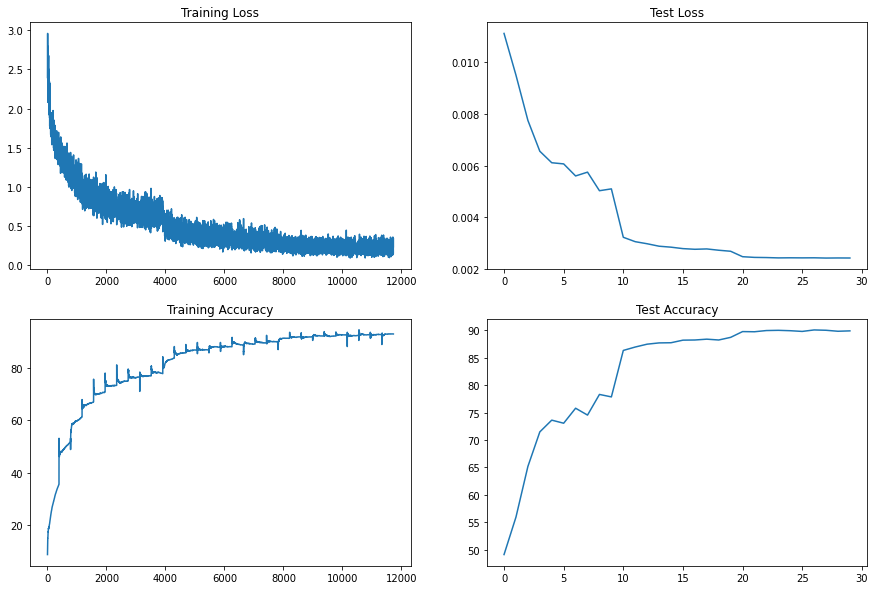

In [8]:
mp.train_test_plots(trl,tra,tel,tea)


------------------------------------------------------------
Model accuracy on 10000 test images: 89.86%
------------------------------------------------------------
 
Category   - Accuracy
plane      - 91.00
car        - 96.40
bird       - 84.50
cat        - 76.30
deer       - 89.50
dog        - 84.10
frog       - 94.60
horse      - 92.20
ship       - 95.80
truck      - 94.20
 


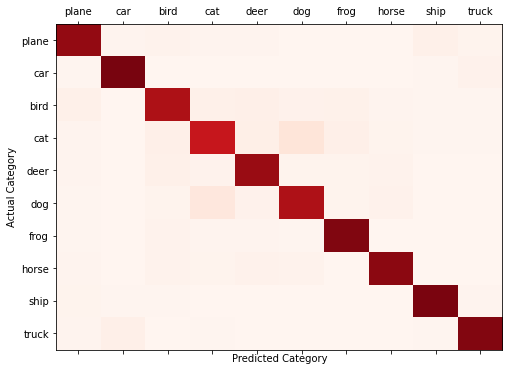

In [9]:
tperform.test_performance(model, testloader, device, classes)

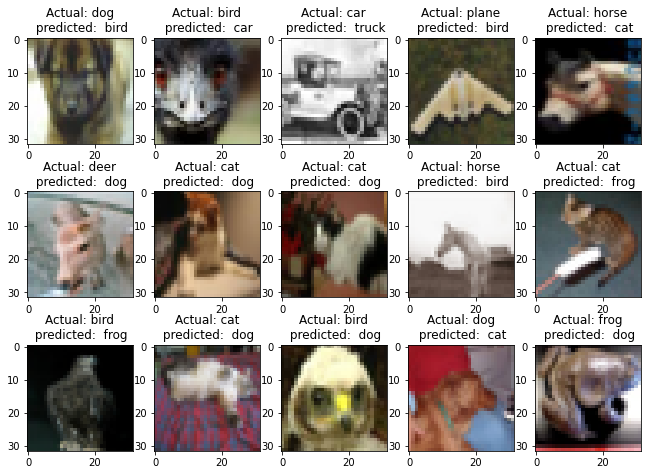

In [10]:
images, actuals, preds = misclassified.test_misclassified(model,device,testloader)
misclassified.plot_images(images, actuals, preds, classes)